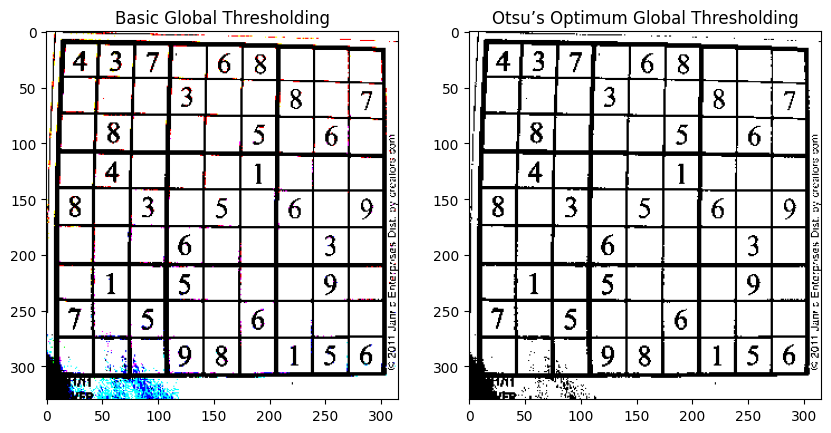

In [54]:
import cv2 as cv 
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu

url = "https://raw.githubusercontent.com/muthuspark/ml_research/master/resources/sudoku4.jpg"
image = io.imread(url)

#I referenced this code from our teacher's 03 jupyter code slide to plot images side-by-side.
def plot_image(image_1, image_2, title_1, title_2): 
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(image_1)
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(image_2, cmap="gray")
    plt.title(title_2)
    plt.show()
    
def basic_global_thresholding(image, threshold, g1, g2):

    for i in image: # I wrote three loops because the image array is three dimeonsinal.
        for j in i :
            for k in j :
                if (k > threshold):
                    g1.append(k) #g1 consisting of pixels with gray levels > T
                else:
                    g2.append(k) #g2 consisting pixels with gray levels ≤ T
    mi_1 = sum(g1) / len(g1) #the mean value of gray levels of pixels in G1. mi_1 =  μ1
    mi_2 = sum(g2) / len(g2) #the mean value of gray levels of pixels in G2. mi_2 =  μ2
    new_threshold = (mi_1 + mi_2) / 2
    if abs(new_threshold - threshold) < 1: #I select predefined value->ε = 1.
        return new_threshold
    else:
        g1.clear()
        g2.clear()
        return basic_global_thresholding(image, new_threshold, g1, g2)

#I referenced this code from our teacher's 10 jupyter code slide to view the image of Otsu's result.
#######################################################################################
def threshold_otsu_impl(image, nbins=0.1):
    
    if len(image.shape) == 1 or len(image.shape) > 2:
        print("must be a grayscale image.")
        return
    if np.min(image) == np.max(image):
        print("the image must have multiple colors")
        return  
    all_colors = image.flatten()
    total_weight = len(all_colors)
    least_variance = -1
    least_variance_threshold = -1
    color_thresholds = np.arange(np.min(image)+nbins, np.max(image)-nbins, nbins)
    
    for color_threshold in color_thresholds:
        bg_pixels = all_colors[all_colors < color_threshold]
        weight_bg = len(bg_pixels) / total_weight
        variance_bg = np.var(bg_pixels)
        fg_pixels = all_colors[all_colors >= color_threshold]
        weight_fg = len(fg_pixels) / total_weight
        variance_fg = np.var(fg_pixels)
        within_class_variance = weight_fg*variance_fg + weight_bg*variance_bg
        if least_variance == -1 or least_variance > within_class_variance:
            least_variance = within_class_variance
            least_variance_threshold = color_threshold
            
    return least_variance_threshold

gray_img = rgb2gray(image)
gray_img*=255
gray_img = gray_img.astype(np.uint8)
threshold_s = threshold_otsu(gray_img)
bin_img_from_lib = gray_img > threshold_s
#######################################################################################
bgt = basic_global_thresholding(image, np.mean(image), g1=[], g2=[]) #bgt means that Basic Global Thresholding

#I referenced this line from geeksforgeeks to be able to plot the threshold image.
#Reference -> https://www.geeksforgeeks.org/python-thresholding-techniques-using-opencv-set-1-simple-thresholding/
ret, threshold_image = cv2.threshold(image,bgt,255,cv2.THRESH_BINARY)
plot_image(threshold_image, bin_img_from_lib, "Basic Global Thresholding", "Otsu’s Optimum Global Thresholding")